## **Project Kelompok** 
##### **Relasi antara Salary dan Years Experience, menggunakan Regresi Linear, SVM, Random Forest**

##### 1. Natasya Salsabila
##### 2. Agnes Situmorang
##### 3. Islam Cahya Wicaksana

# Import Library

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Data Gathering

In [2]:
data = pd.read_csv('Salary_Data.csv')

# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Main Code

#### Tampung Column pada Variable

In [8]:
# Separate attribute and label
X = data['YearsExperience']
y = data['Salary']

In [9]:
# Change the attribute form
X = np.array(X)
X = X[:,np.newaxis]

#### Build Model SVM

In [10]:
# Build a model with C, gamma, and kernel parameters
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}
grid_search = GridSearchCV(model, parameters)

In [11]:
# Train the model with the fit function
grid_search.fit(X,y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [12]:
# Displays the best parameters of the grid_search object
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [22]:
# Create a new SVM model with the best parameters from the grid search results
svm_model = SVR(C=1000000, gamma=0.005, kernel='rbf')
svm_model.fit(X,y)

SVR(C=1000000, gamma=0.005)

#### Build Model Regresi Linear

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
regresi = LinearRegression()
regresi.fit(x_train, y_train)

LinearRegression()

In [21]:
y_pred = regresi.predict(x_test)

#### Build Model Random Forest

In [42]:
model_forest = RandomForestRegressor()

In [43]:
model_forest.fit(x_train, y_train)

RandomForestRegressor()

In [44]:
score = model_forest.score(x_test, y_test)
print(f"Random Forest Model Score: {score}")

Random Forest Model Score: 0.8791004816120038


#### Plotting & Comparing

In [52]:
score_linear_regression = regresi.score(x_test, y_test)
score_random_forest = model_forest.score(x_test, y_test)
score_svm = svm_model.score(x_test, y_test)

print("Linear Regression Score:", score_linear_regression)
print("Random Forest Score:", score_random_forest)
print("SVM Score:", score_svm)

Linear Regression Score: 0.9024461774180497
Random Forest Score: 0.8791004816120038
SVM Score: 0.909223257559894


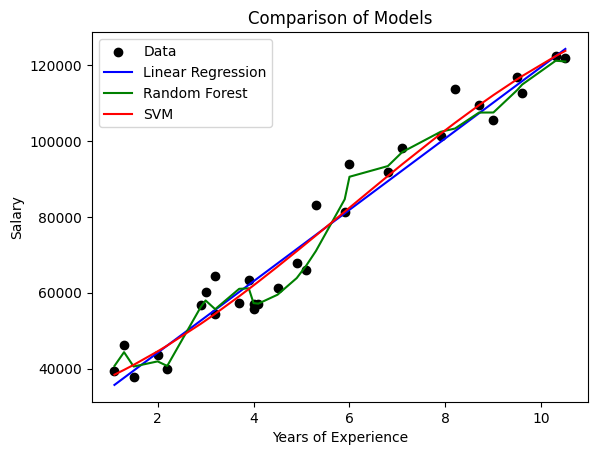

In [51]:
# Plot data as scatter plot
plt.scatter(X, y, color='black', label='Data')

# Plot linear regression predictions
plt.plot(X, regresi.predict(X), color='blue', label='Linear Regression')

# Plot random forest predictions
plt.plot(X, model_forest.predict(X), color='green', label='Random Forest')

# Plot SVM predictions
plt.plot(X, svm_model.predict(X), color='red', label='SVM')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Comparison of Models')
plt.legend()
plt.show()